In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Create dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

#Use get_dummies because neither PCA nor Regression Tree can handle categorical variables.
df = pd.get_dummies(df, columns = ['sex'])
#df.drop('sex', axis=1, inplace=True)

y = df['rings']
X = df.drop('rings', axis=1)

In [2]:
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)


FOR PCA COMPONENT NUMBER 2

Score=0.335844774629

[[ 1.          0.58263053]
 [ 0.58263053  1.        ]]




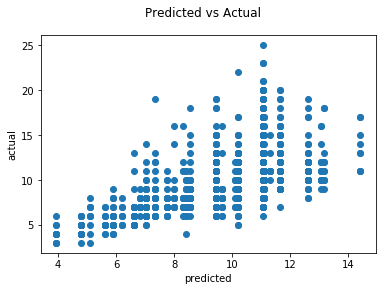


FOR PCA COMPONENT NUMBER 3

Score=0.336899462092

[[ 1.         0.5844115]
 [ 0.5844115  1.       ]]




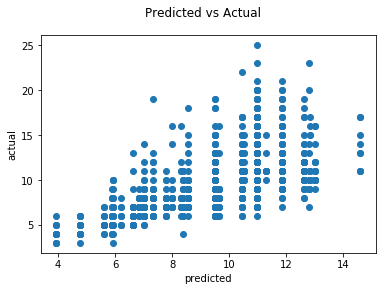


FOR PCA COMPONENT NUMBER 4

Score=0.479559787641

[[ 1.          0.69496829]
 [ 0.69496829  1.        ]]




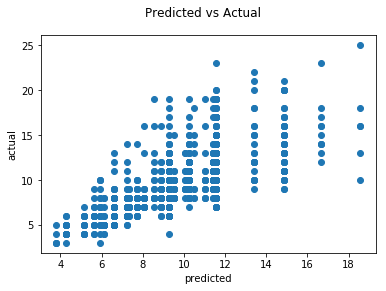


FOR PCA COMPONENT NUMBER 5

Score=0.498412989599

[[ 1.          0.70832917]
 [ 0.70832917  1.        ]]




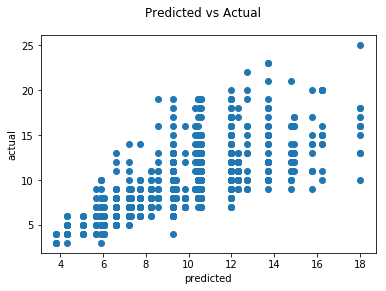


FOR PCA COMPONENT NUMBER 6

Score=0.492164635058

[[ 1.          0.70421856]
 [ 0.70421856  1.        ]]




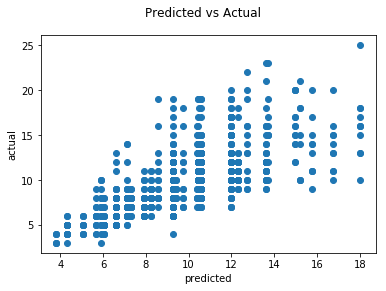


FOR PCA COMPONENT NUMBER 7

Score=0.489299644902

[[ 1.          0.70242912]
 [ 0.70242912  1.        ]]




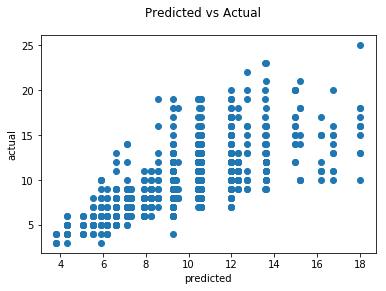

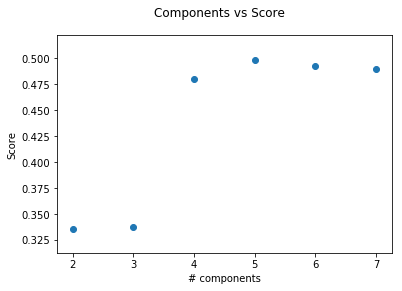

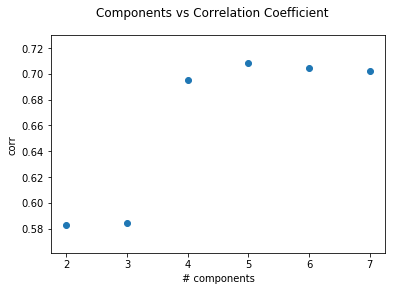

In [3]:
components= list(range(2,8))
scores = []
corr = []

for component_num in components:
    pca = PCA(n_components=component_num, svd_solver='full')
    pca_transform = pca.fit(X).transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca_transform, y, test_size = 0.3, random_state=0)
    
    model = regressor.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    correlation = np.corrcoef(model.predict(X_test),y_test)
    
    scores.append(score)
    corr.append(correlation[1,0])
    
    print("===============================" +"\n")
    print("FOR PCA COMPONENT NUMBER "+ str(component_num)+"\n")
    print('Score='+str(score)+'\n')
    
    print(np.corrcoef(model.predict(X_test),y_test))
    
    print('\n')
    
    plt.scatter(model.predict(X_test), y_test)
    plt.suptitle('Predicted vs Actual')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

plt.scatter(components, scores)
plt.suptitle('Components vs Score')
plt.xlabel('# components')
plt.ylabel('Score')
plt.show()

plt.scatter(components, corr)
plt.suptitle('Components vs Correlation Coefficient')
plt.xlabel('# components')
plt.ylabel('corr')
plt.show()



Using PCA doesn't appear to add much to the algorithm.  It matches earlier best results when set to 5 components, interestingly enough.  I'll explore removing unnecessary features next.


FOR PCA COMPONENT NUMBER 2

Score=0.385707015146

[[ 1.          0.62508134]
 [ 0.62508134  1.        ]]




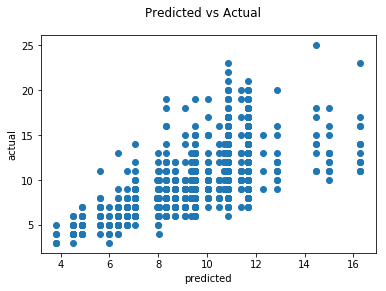


FOR PCA COMPONENT NUMBER 3

Score=0.382914856104

[[ 1.        0.623168]
 [ 0.623168  1.      ]]




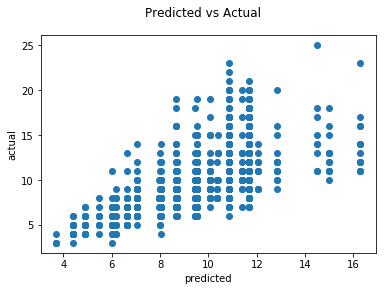


FOR PCA COMPONENT NUMBER 4

Score=0.428985137092

[[ 1.          0.65843492]
 [ 0.65843492  1.        ]]




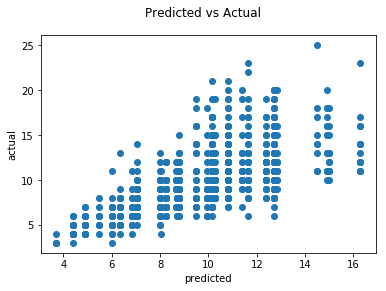


FOR PCA COMPONENT NUMBER 5

Score=0.423529975729

[[ 1.          0.65363657]
 [ 0.65363657  1.        ]]




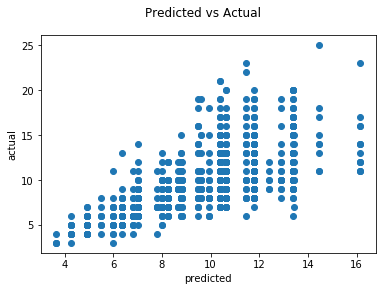


FOR PCA COMPONENT NUMBER 6

Score=0.494110863625

[[ 1.          0.70593298]
 [ 0.70593298  1.        ]]




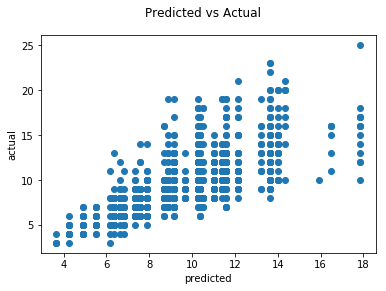


FOR PCA COMPONENT NUMBER 7

Score=0.494110863625

[[ 1.          0.70593298]
 [ 0.70593298  1.        ]]




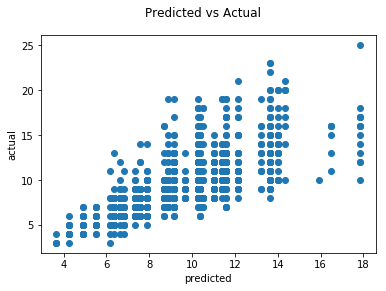

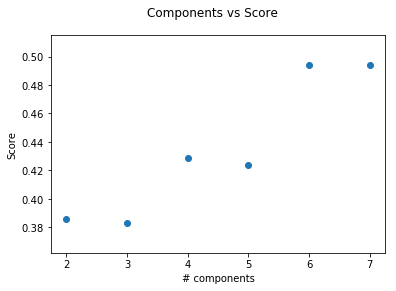

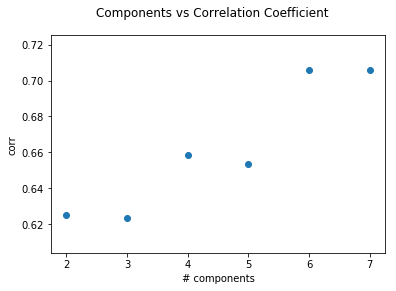

In [4]:
#Do it again, but scale X

components= list(range(2,8))
scores = []
corr = []

for component_num in components:
    scaled_X = StandardScaler().fit_transform(X)
    scaled_X = pd.DataFrame(scaled_X)
    
    pca = PCA(n_components=component_num, svd_solver='full')
    pca_transform = pca.fit(scaled_X).transform(scaled_X)
    X_train, X_test, y_train, y_test = train_test_split(pca_transform, y, test_size = 0.3, random_state=0)
    
    model = regressor.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    correlation = np.corrcoef(model.predict(X_test),y_test)
    
    scores.append(score)
    corr.append(correlation[1,0])
    
    print("===============================" +"\n")
    print("FOR PCA COMPONENT NUMBER "+ str(component_num)+"\n")
    print('Score='+str(score)+'\n')
    
    print(np.corrcoef(model.predict(X_test),y_test))
    
    print('\n')
    
    plt.scatter(model.predict(X_test), y_test)
    plt.suptitle('Predicted vs Actual')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

plt.scatter(components, scores)
plt.suptitle('Components vs Score')
plt.xlabel('# components')
plt.ylabel('Score')
plt.show()

plt.scatter(components, corr)
plt.suptitle('Components vs Correlation Coefficient')
plt.xlabel('# components')
plt.ylabel('corr')
plt.show()


Scaling appears to offer no benefit?  It does affect the outcome, though.